In [1]:
using DifferentialEquations, StaticArrays, DynamicalSystems, CairoMakie, JLD

In [39]:
function TM(u, p, t)

    U(y) = U0 + ΔU0 / ( 1 + exp( -50*(y-ythr) ) )
    σ(x) = 1 / ( 1 + exp( -20*(x-xthr) ) )

    E, x, y = u
    α, τ, τD, τy, J, xthr, ythr, U0, ΔU0, β, I0 = p

    du1 = (-E + α * log( 1 + exp( (J * U(y) * x * E + I0  ) / (α) ) ) ) / τ
    du2 = (1-x)/τD - U(y)*x*E
    du3 = (-y)/τy+β*σ(x)

    return SVector(du1, du2, du3)
end

function output(idx, parameter, u0)
    println("index: $idx; I0: $parameter");flush(stdout)
    println("u0: $u0");flush(stdout)
end
function output(Λ, u0)
    println("Λ: $Λ");flush(stdout)
    println("last point: $u0");flush(stdout)
end
function separate()
    println("----------------");flush(stdout)
    println("  ");flush(stdout)
end

separate (generic function with 1 method)

In [40]:
time = 500.0
transient_time = 250.0
tstep = 0.001
trange = range(0.0, time, step = tstep);
integ_set = (alg = RK4(), adaptive = false, dt = tstep);

In [50]:
const τ = 0.013; const τD = 0.15; const τy = 1.8; const J = 3.07; const β = 0.4375;
const α = 1.15; const U0 = 0.3;
const xthr = 0.9; const ythr = 0.4
const ΔU0 = 0.4

0.4

In [51]:
u0 = SA[0.5287662926292962, 0.9611190233149197, 0.41838101329795496]

3-element SVector{3, Float64} with indices SOneTo(3):
 0.5287662926292962
 0.9611190233149197
 0.41838101329795496

In [52]:
I0range = range( -1.51075, -1.51090, length = 5000 )

-1.51075:-3.0006001200240046e-8:-1.5109

In [53]:
Λs =  zeros(length(I0range), 3)
u0s = zeros(length(I0range), 3);

In [54]:
for (idx, I0) in enumerate(I0range)

    if idx == 1
        global u0 = [0.5287662926292962, 0.9611190233149197, 0.41838101329795496]
    end

    output(idx, I0, u0)

    p = [α, τ, τD, τy, J, xthr, ythr, U0, ΔU0, β, I0]
    ds = ContinuousDynamicalSystem(TM,  u0, p)

    tr = trajectory(ds, 150.0, Δt = tstep; Ttr = transient_time, diffeq = integ_set)
    u0 = tr[end]; ds = ContinuousDynamicalSystem(TM,  u0, p)
    Λ = lyapunovspectrum(ds, time; diffeq = integ_set)
    Λs[idx, :] = Λ
    u0s[idx, :] = u0
    
    output(Λs[idx, :], u0s[idx, :])
    separate()
    
end

index: 1; I0: -1.51075
u0: [0.5287662926292962, 0.9611190233149197, 0.41838101329795496]
Λ: [0.003544518482487531, -2.240754938361196, -11.526796247250308]
last point: [0.45913862042431963, 0.9665660838775383, 0.4046098946644158]
----------------
  
index: 2; I0: -1.5107500300060013
u0: [0.45913862042431963, 0.9665660838775383, 0.4046098946644158]
Λ: [0.0009292695033348041, -2.240975722972386, -11.533991324934506]
last point: [0.40969373674315024, 0.9639963778655536, 0.390536637950733]
----------------
  
index: 3; I0: -1.5107500600120023
u0: [0.40969373674315024, 0.9639963778655536, 0.390536637950733]
Λ: [0.0028141334021637, -2.237076862880241, -11.561339983589466]
last point: [0.37865374753279774, 0.9506661822906662, 0.3768191565431359]
----------------
  
index: 4; I0: -1.5107500900180035
u0: [0.37865374753279774, 0.9506661822906662, 0.3768191565431359]
Λ: [0.0007686629021949581, -2.2317196077699504, -11.57719004158946]
last point: [0.3614622727065105, 0.9169764375610874, 0.36681860

last point: [0.37511654636671965, 0.9468496818650691, 0.37483900835736267]
----------------
  
index: 33; I0: -1.5107509601920384
u0: [0.37511654636671965, 0.9468496818650691, 0.37483900835736267]
Λ: [0.00122742316670021, -2.169630254513119, -11.58185134584005]
last point: [0.3589589760508571, 0.904245387586295, 0.36586989998256997]
----------------
  
index: 34; I0: -1.5107509901980396
u0: [0.3589589760508571, 0.904245387586295, 0.36586989998256997]
Λ: [0.0014797066251391639, -2.169599076533951, -11.60341383105844]
last point: [0.3649611961712879, 0.8052698117608851, 0.37325414200671214]
----------------
  
index: 35; I0: -1.5107510202040408
u0: [0.3649611961712879, 0.8052698117608851, 0.37325414200671214]
Λ: [0.0014376157644803034, -2.1655492998598036, -11.60545903387524]
last point: [5.922282860459379, 0.6328264109298711, 0.39722857636662107]
----------------
  
index: 36; I0: -1.510751050210042
u0: [5.922282860459379, 0.6328264109298711, 0.39722857636662107]
Λ: [0.00246765058222513

Λ: [0.002960774720000982, -2.0997957047589586, -11.628711990359204]
last point: [5.775537603756946, 0.803758288306029, 0.4223415014279652]
----------------
  
index: 65; I0: -1.510751920384077
u0: [5.775537603756946, 0.803758288306029, 0.4223415014279652]
Λ: [0.003292877238689597, -2.093933576169804, -11.621344098331228]
last point: [1.8855819228349522, 0.8708710868557629, 0.43685579217025977]
----------------
  
index: 66; I0: -1.510751950390078
u0: [1.8855819228349522, 0.8708710868557629, 0.43685579217025977]
Λ: [0.0023443860713768722, -2.0872519411108463, -11.608720645881771]
last point: [1.4521328029771376, 0.8873452631538666, 0.4451610922455063]
----------------
  
index: 67; I0: -1.5107519803960792
u0: [1.4521328029771376, 0.8873452631538666, 0.4451610922455063]
Λ: [0.005170675374884372, -2.0792989972575007, -11.606957556556376]
last point: [1.2575806844492796, 0.8976378379095916, 0.45064505333225435]
----------------
  
index: 68; I0: -1.5107520104020804
u0: [1.2575806844492796,

----------------
  
index: 96; I0: -1.510752850570114
u0: [2.0038356537651367, 0.86737798033846, 0.43536834599713803]
Λ: [0.0052492049139901175, -2.01743589127766, -11.633925872515087]
last point: [1.5272096825841257, 0.8839057212007874, 0.44327788300247706]
----------------
  
index: 97; I0: -1.5107528805761152
u0: [1.5272096825841257, 0.8839057212007874, 0.44327788300247706]
Λ: [0.006027277556017789, -2.0112526710831844, -11.625898283171505]
last point: [1.3228591530804246, 0.8939341876467806, 0.44874315255808156]
----------------
  
index: 98; I0: -1.5107529105821165
u0: [1.3228591530804246, 0.8939341876467806, 0.44874315255808156]
Λ: [0.007743794454170283, -2.0071768798782355, -11.620821462590941]
last point: [1.1926648648833775, 0.9015913461880397, 0.4524810916789073]
----------------
  
index: 99; I0: -1.5107529405881177
u0: [1.1926648648833775, 0.9015913461880397, 0.4524810916789073]
Λ: [0.009435770559073324, -2.002175242513871, -11.606000129560531]
last point: [1.09575391375151

Λ: [0.0007957620160105706, -1.9495322290634898, -11.634993627992925]
last point: [0.3665826547142345, 0.931549971795537, 0.36985482274642445]
----------------
  
index: 128; I0: -1.5107538107621525
u0: [0.3665826547142345, 0.931549971795537, 0.36985482274642445]
Λ: [0.0020770427475643653, -1.945482811705999, -11.644129369279561]
last point: [0.35877363675328056, 0.9007619904463923, 0.36612394632083667]
----------------
  
index: 129; I0: -1.5107538407681536
u0: [0.35877363675328056, 0.9007619904463923, 0.36612394632083667]
Λ: [0.0013478993067345083, -1.942721161640761, -11.649190174457178]
last point: [0.35566801436638074, 0.85150027317692, 0.3683282300498789]
----------------
  
index: 130; I0: -1.5107538707741548
u0: [0.35566801436638074, 0.85150027317692, 0.3683282300498789]
Λ: [0.0013215455869177346, -1.9427843100806945, -11.66767439821944]
last point: [0.4121818954437368, 0.7745900093767897, 0.37762645680109086]
----------------
  
index: 131; I0: -1.510753900780156
u0: [0.4121818

----------------
  
index: 159; I0: -1.5107547409481896
u0: [0.7447806786912866, 0.9293320057554819, 0.44783274562593695]
Λ: [0.021433204592039935, -1.848091113633925, -11.61490311922943]
last point: [0.7360374321146054, 0.9290648144220988, 0.44720607472910634]
----------------
  
index: 160; I0: -1.5107547709541909
u0: [0.7360374321146054, 0.9290648144220988, 0.44720607472910634]
Λ: [0.02097313963632278, -1.843430252841772, -11.615697908055797]
last point: [0.7287376978219088, 0.9286891737014482, 0.4466522290521829]
----------------
  
index: 161; I0: -1.510754800960192
u0: [0.7287376978219088, 0.9286891737014482, 0.4466522290521829]
Λ: [0.01979233916907859, -1.8411259175171277, -11.614564048074158]
last point: [0.7228033682490678, 0.9282435876860657, 0.4461741193949454]
----------------
  
index: 162; I0: -1.5107548309661933
u0: [0.7228033682490678, 0.9282435876860657, 0.4461741193949454]
Λ: [0.016272552133976975, -1.8362629962127657, -11.612493307369038]
last point: [0.7181267833780

Λ: [0.012266724856644637, -1.7711477477891304, -11.665414655541559]
last point: [1.0944245244401654, 0.9081340636756511, 0.45482401099728215]
----------------
  
index: 191; I0: -1.510755701140228
u0: [1.0944245244401654, 0.9081340636756511, 0.45482401099728215]
Λ: [0.012698459081699975, -1.7697451446895314, -11.675644042300883]
last point: [1.1499008252849499, 0.9043536259160968, 0.45359518738149973]
----------------
  
index: 192; I0: -1.5107557311462292
u0: [1.1499008252849499, 0.9043536259160968, 0.45359518738149973]
Λ: [0.01151866286257812, -1.7701589610566564, -11.668694233644905]
last point: [1.2175000735192176, 0.9000401389969882, 0.45178974613306094]
----------------
  
index: 193; I0: -1.5107557611522304
u0: [1.2175000735192176, 0.9000401389969882, 0.45178974613306094]
Λ: [0.007792839326598911, -1.7648847930455471, -11.677276283949947]
last point: [1.3039059780222813, 0.8949727022032299, 0.449286672634696]
----------------
  
index: 194; I0: -1.5107557911582317
u0: [1.3039059

----------------
  
index: 222; I0: -1.5107566313262653
u0: [1.1679081914430238, 0.9031723716560295, 0.45313864535615356]
Λ: [0.008471842827448676, -1.6865642726848726, -11.68591862057603]
last point: [1.400623459382066, 0.8898284300022573, 0.4465118170135701]
----------------
  
index: 223; I0: -1.5107566613322665
u0: [1.400623459382066, 0.8898284300022573, 0.4465118170135701]
Λ: [0.004646069261836098, -1.6928218690400796, -11.684600060247071]
last point: [2.110440923128223, 0.8640533635090092, 0.43385566904657374]
----------------
  
index: 224; I0: -1.5107566913382677
u0: [2.110440923128223, 0.8640533635090092, 0.43385566904657374]
Λ: [-0.003564793900317639, -1.6865328019575185, -11.68673772622986]
last point: [9.137952009983836, 0.6593099733421559, 0.4033136752931169]
----------------
  
index: 225; I0: -1.5107567213442687
u0: [9.137952009983836, 0.6593099733421559, 0.4033136752931169]
Λ: [0.0006619431403914224, -1.6826938681500065, -11.671262670219651]
last point: [0.3569009511492

Λ: [-0.0010630369839567438, -1.5990360467839517, -11.626844714108742]
last point: [0.42337177522868136, 0.9650325098463098, 0.39512575575225745]
----------------
  
index: 254; I0: -1.5107575915183036
u0: [0.42337177522868136, 0.9650325098463098, 0.39512575575225745]
Λ: [0.007594267322784507, -1.5916790959741471, -11.626413119304038]
last point: [0.624215063637249, 0.9540588838934854, 0.4318161383270831]
----------------
  
index: 255; I0: -1.5107576215243048
u0: [0.624215063637249, 0.9540588838934854, 0.4318161383270831]
Λ: [0.015106429957808388, -1.5903752795480917, -11.619403500181017]
last point: [0.8564746781597923, 0.929714313516649, 0.45170988970905185]
----------------
  
index: 256; I0: -1.510757651530306
u0: [0.8564746781597923, 0.929714313516649, 0.45170988970905185]
Λ: [0.01565763465632381, -1.5801221385053825, -11.617145840071405]
last point: [1.0916985827345698, 0.9084131645004316, 0.45413052078046184]
----------------
  
index: 257; I0: -1.5107576815363073
u0: [1.0916985

----------------
  
index: 285; I0: -1.5107585217043409
u0: [0.36382982077667003, 0.9193184323827237, 0.3688184228998476]
Λ: [0.006756268276590951, -1.4930867533271779, -11.612312558054896]
last point: [0.6000006617741006, 0.9564047565477023, 0.42873211314871973]
----------------
  
index: 286; I0: -1.5107585517103421
u0: [0.6000006617741006, 0.9564047565477023, 0.42873211314871973]
Λ: [0.020203421842935873, -1.476608059810101, -11.612629751009786]
last point: [0.9755612614633524, 0.9182629959452353, 0.4549592422730789]
----------------
  
index: 287; I0: -1.5107585817163434
u0: [0.9755612614633524, 0.9182629959452353, 0.4549592422730789]
Λ: [0.005363276884677585, -1.4681893085919369, -11.642749867453064]
last point: [0.8205293034992039, 0.9069517051827591, 0.44286836686057207]
----------------
  
index: 288; I0: -1.5107586117223444
u0: [0.8205293034992039, 0.9069517051827591, 0.44286836686057207]
Λ: [0.01834689843659548, -1.4755492054279853, -11.672245996310425]
last point: [0.9105739

Λ: [0.00441984105802036, -1.3660573067406776, -11.638354137504177]
last point: [1.1927665847803068, 0.8976456575747986, 0.4487072580611564]
----------------
  
index: 317; I0: -1.5107594818963792
u0: [1.1927665847803068, 0.8976456575747986, 0.4487072580611564]
Λ: [0.018094219154630588, -1.3767592035346459, -11.654751219577737]
last point: [0.9638093453557712, 0.9177482469522289, 0.4558789479552417]
----------------
  
index: 318; I0: -1.5107595119023804
u0: [0.9638093453557712, 0.9177482469522289, 0.4558789479552417]
Λ: [0.0008662993689009752, -1.3888150174710099, -11.64215943061793]
last point: [2.070828429927882, 0.7017954383357597, 0.3894487472909819]
----------------
  
index: 319; I0: -1.5107595419083817
u0: [2.070828429927882, 0.7017954383357597, 0.3894487472909819]
Λ: [0.01567010151232291, -1.3620595608738242, -11.59487636556946]
last point: [0.6671112157397441, 0.9496403300786146, 0.4367985035600656]
----------------
  
index: 320; I0: -1.510759571914383
u0: [0.6671112157397441

----------------
  
index: 348; I0: -1.5107604120824165
u0: [1.384912902492511, 0.8906046109456676, 0.44692929794495256]
Λ: [0.004260581702063814, -1.2375759033138025, -11.570767227840497]
last point: [0.6252189522506187, 0.9538775555133152, 0.43195400360642444]
----------------
  
index: 349; I0: -1.5107604420884178
u0: [0.6252189522506187, 0.9538775555133152, 0.43195400360642444]
Λ: [0.01277535925870957, -1.2491557673415188, -11.627963226791271]
last point: [0.7080306370145029, 0.9259546837984931, 0.4447417896390631]
----------------
  
index: 350; I0: -1.510760472094419
u0: [0.7080306370145029, 0.9259546837984931, 0.4447417896390631]
Λ: [-0.006888033795495548, -1.2605360211452126, -11.612375786983153]
last point: [8.325510332317185, 0.6860276931120756, 0.4032529327812858]
----------------
  
index: 351; I0: -1.51076050210042
u0: [8.325510332317185, 0.6860276931120756, 0.4032529327812858]
Λ: [0.016271786139127775, -1.2404331517444538, -11.604285613485905]
last point: [0.9101457941892

Λ: [0.010173824919102693, -1.1175162124588884, -11.582280188565782]
last point: [1.2555905291851444, 0.7315580489508731, 0.3868038343986872]
----------------
  
index: 380; I0: -1.5107613722744548
u0: [1.2555905291851444, 0.7315580489508731, 0.3868038343986872]
Λ: [0.013754212054191797, -1.1248717936265165, -11.567719643025766]
last point: [0.9733640411165886, 0.9001892414436875, 0.4440982045748826]
----------------
  
index: 381; I0: -1.510761402280456
u0: [0.9733640411165886, 0.9001892414436875, 0.4440982045748826]
Λ: [0.0007296541353809922, -1.117729160511325, -11.559717202137099]
last point: [0.3693421946649897, 0.9297915213628664, 0.37234589565005044]
----------------
  
index: 382; I0: -1.5107614322864573
u0: [0.3693421946649897, 0.9297915213628664, 0.37234589565005044]
Λ: [0.013102165244935092, -1.1136359439337185, -11.568448533315259]
last point: [0.7212127217321835, 0.9280607062004468, 0.44604276289577427]
----------------
  
index: 383; I0: -1.5107614622924586
u0: [0.72121272

----------------
  
index: 411; I0: -1.5107623024604921
u0: [0.8121121570860873, 0.9279688374145422, 0.451793350536186]
Λ: [0.015377566805034524, -0.9812509948833427, -11.49642464105377]
last point: [1.0762884089077358, 0.9096580144897083, 0.45443018065656343]
----------------
  
index: 412; I0: -1.5107623324664934
u0: [1.0762884089077358, 0.9096580144897083, 0.45443018065656343]
Λ: [-0.0010977246928386827, -0.9640160137419884, -11.492549307900278]
last point: [0.5346667204321993, 0.9617781412663223, 0.4192202699951201]
----------------
  
index: 413; I0: -1.5107623624724944
u0: [0.5346667204321993, 0.9617781412663223, 0.4192202699951201]
Λ: [0.002960179270846546, -0.9674441268310334, -11.554309847378187]
last point: [7.077785469724676, 0.7644752896498151, 0.4131146830744202]
----------------
  
index: 414; I0: -1.5107623924784956
u0: [7.077785469724676, 0.7644752896498151, 0.4131146830744202]
Λ: [0.019430767516969635, -0.9500156439929676, -11.50344636697298]
last point: [0.97528171639

Λ: [0.018104496954930816, -0.8048178803676157, -11.452911782700209]
last point: [0.7591498119351409, 0.9294379753831704, 0.44880216566760783]
----------------
  
index: 443; I0: -1.5107632626525305
u0: [0.7591498119351409, 0.9294379753831704, 0.44880216566760783]
Λ: [0.021316777695395975, -0.8068096727840938, -11.440916924398943]
last point: [0.9215833194025986, 0.9209162237580372, 0.45539888070563445]
----------------
  
index: 444; I0: -1.5107632926585317
u0: [0.9215833194025986, 0.9209162237580372, 0.45539888070563445]
Λ: [0.020413430224431747, -0.8029306933369642, -11.433752593477578]
last point: [1.1709818945048376, 0.9029662221930804, 0.4530561789711049]
----------------
  
index: 445; I0: -1.510763322664533
u0: [1.1709818945048376, 0.9029662221930804, 0.4530561789711049]
Λ: [0.006477855472787559, -0.8042534185872685, -11.430409114978065]
last point: [2.1572563296834866, 0.8615881237226816, 0.43235204977978176]
----------------
  
index: 446; I0: -1.5107633526705342
u0: [2.157256

last point: [0.8301104802030014, 0.9063873801670924, 0.44294460872501373]
----------------
  
index: 474; I0: -1.5107641928385678
u0: [0.8301104802030014, 0.9063873801670924, 0.44294460872501373]
Λ: [0.001347440579893369, -0.6256640962536316, -11.31178938221608]
last point: [0.3780724402804664, 0.9368429480822265, 0.37777563618647697]
----------------
  
index: 475; I0: -1.510764222844569
u0: [0.3780724402804664, 0.9368429480822265, 0.37777563618647697]
Λ: [0.02070487875807161, -0.6103646277407231, -11.277270456213078]
last point: [0.7366157905919871, 0.9290546062940248, 0.4472546759302648]
----------------
  
index: 476; I0: -1.51076425285057
u0: [0.7366157905919871, 0.9290546062940248, 0.4472546759302648]
Λ: [-0.007274580804041598, -0.5939693888999625, -11.271431869526067]
last point: [0.5410299188735458, 0.9608774855278008, 0.42029101835600685]
----------------
  
index: 477; I0: -1.5107642828565713
u0: [0.5410299188735458, 0.9608774855278008, 0.42029101835600685]
Λ: [0.019625379115

----------------
  
index: 505; I0: -1.5107651230246049
u0: [0.918905368677668, 0.9211133527556284, 0.4553527829123187]
Λ: [0.01700404159613968, -0.4249253102090911, -11.11418608545795]
last point: [1.3647790169243488, 0.8916286291674708, 0.44748175253690753]
----------------
  
index: 506; I0: -1.510765153030606
u0: [1.3647790169243488, 0.8916286291674708, 0.44748175253690753]
Λ: [9.4032114083232e-5, -0.4066270582201415, -11.118306095147492]
last point: [0.3756039623994982, 0.8550363257808983, 0.37715569026446333]
----------------
  
index: 507; I0: -1.5107651830366073
u0: [0.3756039623994982, 0.8550363257808983, 0.37715569026446333]
Λ: [0.0118214026149114, -0.4071723704263824, -11.105987831060702]
last point: [0.6127328037975899, 0.954582836902126, 0.4304786974926297]
----------------
  
index: 508; I0: -1.5107652130426086
u0: [0.6127328037975899, 0.954582836902126, 0.4304786974926297]
Λ: [0.02018436714393667, -0.4120523038577705, -11.081782182498255]
last point: [1.0936903210478173,

Λ: [0.019236290832652228, -0.21878049767139213, -10.898981882943911]
last point: [0.8981899006607985, 0.9254508912364134, 0.4534305166021251]
----------------
  
index: 537; I0: -1.5107660832166434
u0: [0.8981899006607985, 0.9254508912364134, 0.4534305166021251]
Λ: [0.019497870262481204, -0.2129538864969151, -10.891127602859019]
last point: [0.780546588692101, 0.9374054687950363, 0.44720600889546]
----------------
  
index: 538; I0: -1.5107661132226444
u0: [0.780546588692101, 0.9374054687950363, 0.44720600889546]
Λ: [0.016147553683634904, -0.20522428914741447, -10.880554841353037]
last point: [0.7205049200346556, 0.9436731409954421, 0.4422585645723818]
----------------
  
index: 539; I0: -1.5107661432286457
u0: [0.7205049200346556, 0.9436731409954421, 0.4422585645723818]
Λ: [0.01804022219358377, -0.20281090272975114, -10.870209969201307]
last point: [0.7220003769527223, 0.9435142689295345, 0.4423966162199702]
----------------
  
index: 540; I0: -1.510766173234647
u0: [0.722000376952722

last point: [0.7570956398351089, 0.9294352603439935, 0.4486706684844118]
----------------
  
index: 568; I0: -1.5107670134026805
u0: [0.7570956398351089, 0.9294352603439935, 0.4486706684844118]
Λ: [0.015298171961810448, -0.044739444299965084, -10.618451818046426]
last point: [1.159378562590532, 0.9027852142846278, 0.4521193745455754]
----------------
  
index: 569; I0: -1.5107670434086817
u0: [1.159378562590532, 0.9027852142846278, 0.4521193745455754]
Λ: [0.01956148873670537, -0.037964662905636264, -10.613167388767867]
last point: [0.8133854753146833, 0.9339307713013633, 0.44943915623003505]
----------------
  
index: 570; I0: -1.510767073414683
u0: [0.8133854753146833, 0.9339307713013633, 0.44943915623003505]
Λ: [0.0033304559138670276, -0.026604863817390308, -10.610782015369153]
last point: [0.5314904471505845, 0.9600811214513039, 0.4189144080431337]
----------------
  
index: 571; I0: -1.5107671034206842
u0: [0.5314904471505845, 0.9600811214513039, 0.4189144080431337]
Λ: [0.000829781

----------------
  
index: 599; I0: -1.5107679435887178
u0: [0.530125980789492, 0.9564256218846623, 0.4190996069261222]
Λ: [0.02144337786247445, -0.2512265836227591, -10.454345240951818]
last point: [0.7267935406565893, 0.9284995409412371, 0.4465054105767229]
----------------
  
index: 600; I0: -1.510767973594719
u0: [0.7267935406565893, 0.9284995409412371, 0.4465054105767229]
Λ: [0.0015634971472341427, -0.24859603025522087, -10.432944138573525]
last point: [0.43169683721845936, 0.9641065482576198, 0.39771789676476144]
----------------
  
index: 601; I0: -1.51076800360072
u0: [0.43169683721845936, 0.9641065482576198, 0.39771789676476144]
Λ: [0.019951245932863616, -0.2649120803081604, -10.44835807076082]
last point: [0.8261517167557604, 0.927278376687365, 0.45244690288347605]
----------------
  
index: 602; I0: -1.5107680336067213
u0: [0.8261517167557604, 0.927278376687365, 0.45244690288347605]
Λ: [0.011739216896797442, -0.2685211826979087, -10.439177421585951]
last point: [0.6588247864

Λ: [0.01832672834180094, -0.5120740708605948, -10.236277209769295]
last point: [1.3010435712701491, 0.895091980353789, 0.4493367150546271]
----------------
  
index: 631; I0: -1.5107689037807561
u0: [1.3010435712701491, 0.895091980353789, 0.4493367150546271]
Λ: [-0.001433950433978047, -0.4973469082856259, -10.236082256538117]
last point: [0.5833513551511307, 0.9524902559605997, 0.4272595142188397]
----------------
  
index: 632; I0: -1.5107689337867574
u0: [0.5833513551511307, 0.9524902559605997, 0.4272595142188397]
Λ: [0.0074781987696174255, -0.5251833657853802, -10.247739988204598]
last point: [1.156516429335526, 0.896565245104441, 0.44678586239989604]
----------------
  
index: 633; I0: -1.5107689637927586
u0: [1.156516429335526, 0.896565245104441, 0.44678586239989604]
Λ: [0.012882458585557711, -0.543285638163964, -10.23305272272823]
last point: [1.220887691669074, 0.8998295150406621, 0.4516932955421652]
----------------
  
index: 634; I0: -1.5107689937987598
u0: [1.220887691669074,

----------------
  
index: 662; I0: -1.5107698339667934
u0: [0.8642391268784715, 0.8546256970219227, 0.40775458355777383]
Λ: [0.0066657827124948716, -0.7186063098881136, -10.029306322702057]
last point: [0.35855274081552685, 0.8985934233765693, 0.3661749595446432]
----------------
  
index: 663; I0: -1.5107698639727947
u0: [0.35855274081552685, 0.8985934233765693, 0.3661749595446432]
Λ: [0.006147726564962037, -0.7199430241307412, -10.036542445226097]
last point: [0.45647498873054876, 0.9315071200203402, 0.4066746587910083]
----------------
  
index: 664; I0: -1.5107698939787957
u0: [0.45647498873054876, 0.9315071200203402, 0.4066746587910083]
Λ: [0.0008749184794539599, -0.7186066071586195, -10.007263927564885]
last point: [0.4307039044669652, 0.9659724037714595, 0.39728126626130705]
----------------
  
index: 665; I0: -1.510769923984797
u0: [0.4307039044669652, 0.9659724037714595, 0.39728126626130705]
Λ: [0.004933438615085135, -0.7205133184595096, -10.031918068459765]
last point: [0.71

Λ: [-0.0001660794305422746, -0.856756799945218, -9.902939351558958]
last point: [0.7586453653412725, 0.9114454457480962, 0.44239980747321145]
----------------
  
index: 694; I0: -1.5107707941588318
u0: [0.7586453653412725, 0.9114454457480962, 0.44239980747321145]
Λ: [0.0051911674710471145, -0.8762701067514655, -9.85928827254791]
last point: [0.6058008114535669, 0.949200611767058, 0.43055383409747355]
----------------
  
index: 695; I0: -1.510770824164833
u0: [0.6058008114535669, 0.949200611767058, 0.43055383409747355]
Λ: [0.021754127527727225, -0.8779473616496629, -9.871242158522652]
last point: [1.0625606472140374, 0.9103914864224928, 0.4553682103614872]
----------------
  
index: 696; I0: -1.5107708541708342
u0: [1.0625606472140374, 0.9103914864224928, 0.4553682103614872]
Λ: [0.013858735641086199, -0.8822803422366253, -9.866413108754497]
last point: [1.1772697981217133, 0.9010841980704333, 0.4512252280816646]
----------------
  
index: 697; I0: -1.5107708841768355
u0: [1.177269798121

----------------
  
index: 725; I0: -1.510771724344869
u0: [1.4625546091681647, 0.8869039735005958, 0.4449429846410238]
Λ: [0.0019290916471101272, -0.999494667373855, -9.782019820698034]
last point: [0.768642948411719, 0.7092845927179923, 0.3848806713427498]
----------------
  
index: 726; I0: -1.51077175435087
u0: [0.768642948411719, 0.7092845927179923, 0.3848806713427498]
Λ: [0.001466353145978572, -1.0017441807354315, -9.730449844480578]
last point: [0.41231516050219763, 0.9645570479239678, 0.39145130082541907]
----------------
  
index: 727; I0: -1.5107717843568713
u0: [0.41231516050219763, 0.9645570479239678, 0.39145130082541907]
Λ: [0.007885757838596436, -0.9897964042563481, -9.719997242950674]
last point: [0.7182837177368184, 0.9443168174705237, 0.44194727724667787]
----------------
  
index: 728; I0: -1.5107718143628726
u0: [0.7182837177368184, 0.9443168174705237, 0.44194727724667787]
Λ: [0.017888165739710495, -1.0070400922939584, -9.724288929564295]
last point: [1.0834768260179

Λ: [0.011939347025002984, -1.0870274029865978, -9.670762666776206]
last point: [1.1666483444349507, 0.8968455564502261, 0.4472922511478889]
----------------
  
index: 757; I0: -1.5107726845369074
u0: [1.1666483444349507, 0.8968455564502261, 0.4472922511478889]
Λ: [0.002572624435826079, -1.106652600245253, -9.645040894723468]
last point: [0.4774350958492407, 0.9214155735059429, 0.4117584695160728]
----------------
  
index: 758; I0: -1.5107727145429086
u0: [0.4774350958492407, 0.9214155735059429, 0.4117584695160728]
Λ: [0.013350792208946994, -1.0978970797747039, -9.642762534777603]
last point: [0.781585503543634, 0.9293095884912551, 0.4501230832422563]
----------------
  
index: 759; I0: -1.5107727445489099
u0: [0.781585503543634, 0.9293095884912551, 0.4501230832422563]
Λ: [0.009081086305578124, -1.0796189987996923, -9.595892995388272]
last point: [0.5113423670319422, 0.9641522910464485, 0.4151803791780841]
----------------
  
index: 760; I0: -1.5107727745549109
u0: [0.5113423670319422,

----------------
  
index: 788; I0: -1.5107736147229447
u0: [1.1909479935476894, 0.8993162198900101, 0.45011407991241903]
Λ: [0.0026900475001171826, -1.165832959940212, -9.550977819127283]
last point: [1.0911431733921353, 0.9083388895152723, 0.45428069422831985]
----------------
  
index: 789; I0: -1.5107736447289457
u0: [1.0911431733921353, 0.9083388895152723, 0.45428069422831985]
Λ: [0.015421879333814115, -1.1725592206848385, -9.562383379826034]
last point: [0.697831509116052, 0.94650602589291, 0.4399786668894595]
----------------
  
index: 790; I0: -1.510773674734947
u0: [0.697831509116052, 0.94650602589291, 0.4399786668894595]
Λ: [0.005781406115835415, -1.1767187470336125, -9.544520661899513]
last point: [0.6430158402162403, 0.9458254812174871, 0.43529336904593185]
----------------
  
index: 791; I0: -1.5107737047409482
u0: [0.6430158402162403, 0.9458254812174871, 0.43529336904593185]
Λ: [0.002092152131746427, -1.1817389606957542, -9.576546698082934]
last point: [0.3727571474206100

last point: [1.0119587658296276, 0.9147436261544882, 0.4552698248171463]
----------------
  
index: 820; I0: -1.510774574914983
u0: [1.0119587658296276, 0.9147436261544882, 0.4552698248171463]
Λ: [0.00874411151016861, -1.230539911772463, -9.467901154001392]
last point: [1.1863132967559886, 0.8973099414448599, 0.44824203298427956]
----------------
  
index: 821; I0: -1.5107746049209843
u0: [1.1863132967559886, 0.8973099414448599, 0.44824203298427956]
Λ: [0.015095138383619505, -1.2438978765788171, -9.536413853905511]
last point: [0.9463177934753247, 0.9191297805810995, 0.4557158800507329]
----------------
  
index: 822; I0: -1.5107746349269855
u0: [0.9463177934753247, 0.9191297805810995, 0.4557158800507329]
Λ: [0.01780943119668957, -1.24930152628829, -9.461805504508229]
last point: [1.3032264084684113, 0.8949500186762489, 0.44925651451904275]
----------------
  
index: 823; I0: -1.5107746649329865
u0: [1.3032264084684113, 0.8949500186762489, 0.44925651451904275]
Λ: [0.0016592944184662865

u0: [0.8018408013520625, 0.9286518490966172, 0.451213588697292]
Λ: [0.012310316989971534, -1.2889499802732451, -9.400637318349828]
last point: [0.5002240026476121, 0.9090768384846261, 0.41450844970481865]
----------------
  
index: 852; I0: -1.5107755351070213
u0: [0.5002240026476121, 0.9090768384846261, 0.41450844970481865]
Λ: [0.013411605608744888, -1.300399090305302, -9.406269613168712]
last point: [1.1686856466874735, 0.9019263105201571, 0.4516751475248255]
----------------
  
index: 853; I0: -1.5107755651130226
u0: [1.1686856466874735, 0.9019263105201571, 0.4516751475248255]
Λ: [0.0014127492866423254, -1.3204104531916794, -9.43750377669927]
last point: [8.599433310525002, 0.7678791112353378, 0.42118696836258773]
----------------
  
index: 854; I0: -1.5107755951190238
u0: [8.599433310525002, 0.7678791112353378, 0.42118696836258773]
Λ: [0.0026153708106999513, -1.2989532481657649, -9.434329828997798]
last point: [1.090214399508584, 0.9084093713850839, 0.4543198873380093]
------------

last point: [1.0877108976482441, 0.9085925698168048, 0.4549520794388318]
----------------
  
index: 883; I0: -1.5107764652930586
u0: [1.0877108976482441, 0.9085925698168048, 0.4549520794388318]
Λ: [0.011924904786347019, -1.3472558948780318, -9.3361766074738]
last point: [1.168873618956893, 0.9019062064136223, 0.4516645630757648]
----------------
  
index: 884; I0: -1.5107764952990599
u0: [1.168873618956893, 0.9019062064136223, 0.4516645630757648]
Λ: [0.0034312295747006396, -1.3545480973306752, -9.344937078544765]
last point: [0.4445765662742024, 0.9668309460932951, 0.4010291183690904]
----------------
  
index: 885; I0: -1.510776525305061
u0: [0.4445765662742024, 0.9668309460932951, 0.4010291183690904]
Λ: [0.010477173405790076, -1.3544685365894538, -9.371218587090683]
last point: [1.2410283544399787, 0.8986544147693295, 0.4511469072760114]
----------------
  
index: 886; I0: -1.5107765553110621
u0: [1.2410283544399787, 0.8986544147693295, 0.4511469072760114]
Λ: [0.0018244866664050856, 

u0: [0.7730093825892945, 0.8775426139615174, 0.41820543269219296]
Λ: [0.015564953155613143, -1.396441361695778, -9.337618789712796]
last point: [1.2049290303939866, 0.9007883388185157, 0.45212607451297154]
----------------
  
index: 915; I0: -1.510777425485097
u0: [1.2049290303939866, 0.9007883388185157, 0.45212607451297154]
Λ: [0.019930613560263166, -1.3907107042603277, -9.325782883160564]
last point: [0.8539826639545319, 0.9256154284056529, 0.45359313346871893]
----------------
  
index: 916; I0: -1.5107774554910982
u0: [0.8539826639545319, 0.9256154284056529, 0.45359313346871893]
Λ: [0.013387517452673608, -1.3906819003070023, -9.275828094127853]
last point: [0.7678753387298382, 0.9109931284378959, 0.4427070521611324]
----------------
  
index: 917; I0: -1.5107774854970994
u0: [0.7678753387298382, 0.9109931284378959, 0.4427070521611324]
Λ: [0.019452057711612465, -1.3945762473846668, -9.269329261095153]
last point: [1.0899517064937179, 0.908544885514526, 0.454164972084352]
-----------

last point: [1.8033808707142533, 0.8706629729718068, 0.4354636572586962]
----------------
  
index: 946; I0: -1.5107783556711343
u0: [1.8033808707142533, 0.8706629729718068, 0.4354636572586962]
Λ: [-0.00863564702387365, -1.4385552540890558, -9.26627382833393]
last point: [1.8520961367493283, 0.8599843020454491, 0.42733835599397907]
----------------
  
index: 947; I0: -1.5107783856771355
u0: [1.8520961367493283, 0.8599843020454491, 0.42733835599397907]
Λ: [0.0018062994096962337, -1.4478187548121697, -9.27077381325069]
last point: [0.7156057116932336, 0.8816779930478149, 0.4184638621513395]
----------------
  
index: 948; I0: -1.5107784156831365
u0: [0.7156057116932336, 0.8816779930478149, 0.4184638621513395]
Λ: [0.002234304328044164, -1.451657717352948, -9.261862793444717]
last point: [0.5093861895883471, 0.9231708501010041, 0.4180693480875093]
----------------
  
index: 949; I0: -1.5107784456891378
u0: [0.5093861895883471, 0.9231708501010041, 0.4180693480875093]
Λ: [0.00340950734914957

u0: [0.5706342969540185, 0.9593450450414923, 0.4246562613728472]
Λ: [0.018112391574922032, -1.4691209021983946, -9.228014398456304]
last point: [0.9668751966464182, 0.9190527608638468, 0.4548777372799592]
----------------
  
index: 978; I0: -1.5107793158631726
u0: [0.9668751966464182, 0.9190527608638468, 0.4548777372799592]
Λ: [0.007893927718010077, -1.4692355803819452, -9.239770792425837]
last point: [0.7771114374603558, 0.9101868583829404, 0.44273895586691187]
----------------
  
index: 979; I0: -1.5107793458691738
u0: [0.7771114374603558, 0.9101868583829404, 0.44273895586691187]
Λ: [0.016009760417064433, -1.4797864638506564, -9.224967389726602]
last point: [0.9539490639918135, 0.9184815678011778, 0.45581782381872443]
----------------
  
index: 980; I0: -1.510779375875175
u0: [0.9539490639918135, 0.9184815678011778, 0.45581782381872443]
Λ: [0.005351679261001397, -1.4976611371810271, -9.213022953816827]
last point: [1.8508605879833069, 0.8677390824038249, 0.4335846946551015]
---------

last point: [1.0800806090662156, 0.9093472209855321, 0.45435788750782385]
----------------
  
index: 1009; I0: -1.51078024604921
u0: [1.0800806090662156, 0.9093472209855321, 0.45435788750782385]
Λ: [0.0204304912146228, -1.51863759011539, -9.178368765869518]
last point: [0.9534286739459263, 0.9185203002043518, 0.455813851418076]
----------------
  
index: 1010; I0: -1.5107802760552111
u0: [0.9534286739459263, 0.9185203002043518, 0.455813851418076]
Λ: [0.0013865669818619224, -1.509399979141312, -9.172757638832348]
last point: [0.579588817003996, 0.9425305520685624, 0.4282114153423396]
----------------
  
index: 1011; I0: -1.5107803060612122
u0: [0.579588817003996, 0.9425305520685624, 0.4282114153423396]
Λ: [0.00732814557897264, -1.510610558538206, -9.174808482319504]
last point: [1.1505346118863355, 0.8956702150353028, 0.44581340580423157]
----------------
  
index: 1012; I0: -1.5107803360672134
u0: [1.1505346118863355, 0.8956702150353028, 0.44581340580423157]
Λ: [0.012251071417253342, -

u0: [0.8878737407326321, 0.9233427203533787, 0.4546696138661475]
Λ: [0.002990233504891744, -1.5327011202596936, -9.143080733227686]
last point: [0.7641607530966749, 0.936343534580879, 0.4468845682253265]
----------------
  
index: 1041; I0: -1.5107812062412482
u0: [0.7641607530966749, 0.936343534580879, 0.4468845682253265]
Λ: [0.01776181702499642, -1.5384764168884015, -9.126141495551973]
last point: [0.9046234255112429, 0.922300137724488, 0.4550143991237763]
----------------
  
index: 1042; I0: -1.5107812362472495
u0: [0.9046234255112429, 0.922300137724488, 0.4550143991237763]
Λ: [0.0028073529345911726, -1.5424584418590326, -9.144482379012468]
last point: [0.45237153830987614, 0.9668468373901474, 0.4029845110580498]
----------------
  
index: 1043; I0: -1.5107812662532507
u0: [0.45237153830987614, 0.9668468373901474, 0.4029845110580498]
Λ: [0.011616115779750266, -1.5498698767141825, -9.130435728178721]
last point: [0.7046455830399161, 0.9240649408457652, 0.4441167963264568]
-----------

last point: [0.6976847274288906, 0.9203067338402491, 0.44233716230542186]
----------------
  
index: 1072; I0: -1.5107821364272855
u0: [0.6976847274288906, 0.9203067338402491, 0.44233716230542186]
Λ: [0.0008663443052959104, -1.5703310509205388, -9.128116072971602]
last point: [0.40933519556384906, 0.9643424336122266, 0.39038116449625127]
----------------
  
index: 1073; I0: -1.5107821664332866
u0: [0.40933519556384906, 0.9643424336122266, 0.39038116449625127]
Λ: [0.01995225245835166, -1.5591831373878433, -9.108521145326314]
last point: [0.8162006360575369, 0.9277460344566589, 0.45200430152154947]
----------------
  
index: 1074; I0: -1.5107821964392878
u0: [0.8162006360575369, 0.9277460344566589, 0.45200430152154947]
Λ: [0.007713200922764633, -1.5658754241490112, -9.091468997480442]
last point: [0.9545044622737221, 0.919545276823893, 0.4550857634935863]
----------------
  
index: 1075; I0: -1.510782226445289
u0: [0.9545044622737221, 0.919545276823893, 0.4550857634935863]
Λ: [0.00033426

----------------
  
index: 1103; I0: -1.5107830666133226
u0: [1.2129609579021123, 0.8964416110719158, 0.4482413986863341]
Λ: [0.00328762685677886, -1.600996691474101, -9.072688554885632]
last point: [0.4290805670919466, 0.9663963726329622, 0.39677053629809156]
----------------
  
index: 1104; I0: -1.5107830966193239
u0: [0.4290805670919466, 0.9663963726329622, 0.39677053629809156]
Λ: [0.017947842484125304, -1.5972547549333316, -9.075853481541015]
last point: [1.078583908463476, 0.909235333134209, 0.4551150308032233]
----------------
  
index: 1105; I0: -1.510783126625325
u0: [1.078583908463476, 0.909235333134209, 0.4551150308032233]
Λ: [0.008468687835879831, -1.5868325959913205, -9.075161900071755]
last point: [0.6940360134213154, 0.9240027409973964, 0.4430810569363316]
----------------
  
index: 1106; I0: -1.5107831566313263
u0: [0.6940360134213154, 0.9240027409973964, 0.4430810569363316]
Λ: [0.010787602674875718, -1.5946902395495879, -9.05538577394867]
last point: [0.6584729275088148

Λ: [0.00276574741139737, -1.613577950857867, -9.042081305220027]
last point: [1.1203261092946113, 0.8958009515915561, 0.4450547906338502]
----------------
  
index: 1135; I0: -1.5107840268053612
u0: [1.1203261092946113, 0.8958009515915561, 0.4450547906338502]
Λ: [0.013975082395615014, -1.6228602146642839, -9.010248988710698]
last point: [0.6907766845228017, 0.9472613952765268, 0.43927051749365853]
----------------
  
index: 1136; I0: -1.5107840568113622
u0: [0.6907766845228017, 0.9472613952765268, 0.43927051749365853]
Λ: [0.0015712269650113631, -1.6125142727758215, -9.042672379333716]
last point: [0.5304923413433084, 0.9272643849954082, 0.4218642220774329]
----------------
  
index: 1137; I0: -1.5107840868173634
u0: [0.5304923413433084, 0.9272643849954082, 0.4218642220774329]
Λ: [-0.005987744497254578, -1.6223535726545917, -9.069380988506806]
last point: [1.9171538523065725, 0.8712486818101244, 0.43766123201224943]
----------------
  
index: 1138; I0: -1.5107841168233647
u0: [1.9171538

last point: [1.5659023847229347, 0.8826851805653497, 0.4428167859437047]
----------------
  
index: 1166; I0: -1.5107849569913983
u0: [1.5659023847229347, 0.8826851805653497, 0.4428167859437047]
Λ: [0.022716266572537967, -1.6281288462834445, -9.01335344736593]
last point: [0.9141694265470872, 0.921447956306682, 0.45527545398936514]
----------------
  
index: 1167; I0: -1.5107849869973995
u0: [0.9141694265470872, 0.921447956306682, 0.45527545398936514]
Λ: [0.01489388735698492, -1.6385858418023365, -9.062151223830941]
last point: [0.8838077812610646, 0.9238367793495011, 0.45447542435027544]
----------------
  
index: 1168; I0: -1.5107850170034007
u0: [0.8838077812610646, 0.9238367793495011, 0.45447542435027544]
Λ: [0.009508420630191815, -1.630238324014893, -9.020304892950442]
last point: [0.8706848297378511, 0.9042963394597021, 0.4432935444636665]
----------------
  
index: 1169; I0: -1.510785047009402
u0: [0.8706848297378511, 0.9042963394597021, 0.4432935444636665]
Λ: [0.004768346302526

----------------
  
index: 1197; I0: -1.5107858871774356
u0: [0.6178634133143238, 0.9424534766788374, 0.4331582962845907]
Λ: [0.005396862123615351, -1.6545874875734325, -8.973096903450953]
last point: [0.41134945901662157, 0.9646690063168863, 0.39109635699342676]
----------------
  
index: 1198; I0: -1.5107859171834366
u0: [0.41134945901662157, 0.9646690063168863, 0.39109635699342676]
Λ: [0.014410079456572068, -1.635970959348132, -8.986328388658865]
last point: [0.5868108370576177, 0.940716519141244, 0.42947591266397656]
----------------
  
index: 1199; I0: -1.5107859471894378
u0: [0.5868108370576177, 0.940716519141244, 0.42947591266397656]
Λ: [0.004710648465213715, -1.6566401586536625, -8.980711445817269]
last point: [0.3984556192151132, 0.9619172389695245, 0.3862010897566343]
----------------
  
index: 1200; I0: -1.510785977195439
u0: [0.3984556192151132, 0.9619172389695245, 0.3862010897566343]
Λ: [0.014870667406873313, -1.6388769494758975, -8.964485315783659]
last point: [0.57584136

Λ: [0.0005342725493113349, -1.659627868316151, -8.952333224156163]
last point: [0.44954009544218143, 0.9668663965377071, 0.4022870697136643]
----------------
  
index: 1229; I0: -1.5107868473694739
u0: [0.44954009544218143, 0.9668663965377071, 0.4022870697136643]
Λ: [0.007525505250881266, -1.6641880145472938, -8.992245244528467]
last point: [0.8015609310255122, 0.9329374137345297, 0.4495268845499674]
----------------
  
index: 1230; I0: -1.5107868773754751
u0: [0.8015609310255122, 0.9329374137345297, 0.4495268845499674]
Λ: [0.015166706152503684, -1.6600191841888896, -8.956364017651525]
last point: [0.7696432632838145, 0.938827324379448, 0.4463081750762409]
----------------
  
index: 1231; I0: -1.5107869073814764
u0: [0.7696432632838145, 0.938827324379448, 0.4463081750762409]
Λ: [0.007368079938893026, -1.6674461310052195, -9.005445179249579]
last point: [1.140811886581038, 0.9044998653774017, 0.45310417513852]
----------------
  
index: 1232; I0: -1.5107869373874776
u0: [1.1408118865810

----------------
  
index: 1260; I0: -1.5107877775555112
u0: [0.7611385522779538, 0.92937156111257, 0.44894779867443746]
Λ: [0.007728075622299945, -1.6989203288659664, -8.959130151413957]
last point: [1.356311081326111, 0.8922535620363998, 0.44788528360526786]
----------------
  
index: 1261; I0: -1.5107878075615122
u0: [1.356311081326111, 0.8922535620363998, 0.44788528360526786]
Λ: [-0.0005173617787067045, -1.6773773798517073, -8.942323210327752]
last point: [1.7439678443402113, 0.8682901977647868, 0.43251822584470234]
----------------
  
index: 1262; I0: -1.5107878375675134
u0: [1.7439678443402113, 0.8682901977647868, 0.43251822584470234]
Λ: [0.0033605386580646286, -1.678050481784406, -8.941612681435208]
last point: [0.448928827455487, 0.9668677435230798, 0.4021347027125019]
----------------
  
index: 1263; I0: -1.5107878675735147
u0: [0.448928827455487, 0.9668677435230798, 0.4021347027125019]
Λ: [0.009593626581457064, -1.6821932525345156, -8.992029024671368]
last point: [0.974020739

Λ: [0.028303851220368614, -1.6798968342679166, -8.917648937773803]
last point: [0.957711258713373, 0.9181919883551236, 0.4558516118336011]
----------------
  
index: 1292; I0: -1.5107887377475495
u0: [0.957711258713373, 0.9181919883551236, 0.4558516118336011]
Λ: [0.001487875091625533, -1.6925043554948782, -8.958221455130747]
last point: [0.35410823855720786, 0.8623523792677668, 0.3661506636734625]
----------------
  
index: 1293; I0: -1.5107887677535508
u0: [0.35410823855720786, 0.8623523792677668, 0.3661506636734625]
Λ: [0.00929789040365104, -1.690878898735268, -8.956359125212257]
last point: [0.8510623895070003, 0.9285819204136676, 0.45219482733700944]
----------------
  
index: 1294; I0: -1.510788797759552
u0: [0.8510623895070003, 0.9285819204136676, 0.45219482733700944]
Λ: [0.009982119213567254, -1.6878115704443615, -8.916259220605998]
last point: [1.150801690292552, 0.9035157998950919, 0.45243057286647004]
----------------
  
index: 1295; I0: -1.510788827765553
u0: [1.150801690292

----------------
  
index: 1323; I0: -1.5107896679335868
u0: [11.327309795856543, 0.5942819423867975, 0.4062406746264301]
Λ: [0.010467731869730417, -1.7039697165098318, -8.92787463391814]
last point: [0.8428372296436164, 0.9292854383414901, 0.451821560267472]
----------------
  
index: 1324; I0: -1.5107896979395878
u0: [0.8428372296436164, 0.9292854383414901, 0.451821560267472]
Λ: [0.00999521464481537, -1.7013716093103561, -8.88412028705088]
last point: [1.1157651618007947, 0.8971217121816231, 0.4460989353570752]
----------------
  
index: 1325; I0: -1.510789727945589
u0: [1.1157651618007947, 0.8971217121816231, 0.4460989353570752]
Λ: [0.0024304814571737485, -1.7022283391569777, -8.939895231597319]
last point: [1.435312990509777, 0.8883455345589659, 0.44579066578483206]
----------------
  
index: 1326; I0: -1.5107897579515903
u0: [1.435312990509777, 0.8883455345589659, 0.44579066578483206]
Λ: [0.002560219246264834, -1.6976515398109855, -8.94475137638153]
last point: [0.6634198651848258

Λ: [0.011060730695628896, -1.7072335268789158, -8.864512559083405]
last point: [1.120658122796195, 0.8970713651851725, 0.44619785048073723]
----------------
  
index: 1355; I0: -1.5107906281256251
u0: [1.120658122796195, 0.8970713651851725, 0.44619785048073723]
Λ: [-1.5027111656467233e-5, -1.7130876927797167, -8.936911172413685]
last point: [3.823804222456746, 0.8373349047622449, 0.42947318809518936]
----------------
  
index: 1356; I0: -1.5107906581316264
u0: [3.823804222456746, 0.8373349047622449, 0.42947318809518936]
Λ: [0.012370771382143474, -1.7164562711745255, -8.901926730404307]
last point: [0.9093495421555103, 0.9233976946755108, 0.45428497272734913]
----------------
  
index: 1357; I0: -1.5107906881376276
u0: [0.9093495421555103, 0.9233976946755108, 0.45428497272734913]
Λ: [0.02489362073760585, -1.6915592145729417, -8.879610523912506]
last point: [0.7149042852725891, 0.9270979222189767, 0.4454759214862553]
----------------
  
index: 1358; I0: -1.5107907181436286
u0: [0.7149042

----------------
  
index: 1386; I0: -1.5107915583116622
u0: [1.2114185245972717, 0.9004701751839435, 0.45198438600685037]
Λ: [0.009439256336002328, -1.7267314770726223, -8.8943002982443]
last point: [0.8118984848493995, 0.9319099498784352, 0.4502069915668989]
----------------
  
index: 1387; I0: -1.5107915883176635
u0: [0.8118984848493995, 0.9319099498784352, 0.4502069915668989]
Λ: [0.014502086319009082, -1.7079903727913823, -8.861144595731824]
last point: [0.7244223509773529, 0.9282002986057871, 0.4463233348025647]
----------------
  
index: 1388; I0: -1.5107916183236647
u0: [0.7244223509773529, 0.9282002986057871, 0.4463233348025647]
Λ: [0.005531467298391165, -1.7161357127005898, -8.873436226269238]
last point: [0.3801065707761612, 0.9528498661082625, 0.37753163020303854]
----------------
  
index: 1389; I0: -1.510791648329666
u0: [0.3801065707761612, 0.9528498661082625, 0.37753163020303854]
Λ: [0.008115174615452437, -1.7256408184414607, -8.89500650478927]
last point: [0.70471317326

Λ: [0.018559067381456993, -1.7175514878476348, -8.828928079538263]
last point: [0.9454435767357945, 0.921024439684688, 0.4545795985225449]
----------------
  
index: 1418; I0: -1.5107925185037008
u0: [0.9454435767357945, 0.921024439684688, 0.4545795985225449]
Λ: [0.0006495927766391722, -1.7359331879745425, -8.883060010119765]
last point: [1.7319980325893152, 0.8766910715288796, 0.4399224681162902]
----------------
  
index: 1419; I0: -1.510792548509702
u0: [1.7319980325893152, 0.8766910715288796, 0.4399224681162902]
Λ: [0.007896123677657359, -1.7354258091037778, -8.883542874626873]
last point: [1.101835417476645, 0.9075188535256496, 0.4541678132662891]
----------------
  
index: 1420; I0: -1.510792578515703
u0: [1.101835417476645, 0.9075188535256496, 0.4541678132662891]
Λ: [0.0148973676927609, -1.7254536690135405, -8.899903655098248]
last point: [1.110662395297176, 0.9069784636426785, 0.4544976608730365]
----------------
  
index: 1421; I0: -1.5107926085217043
u0: [1.110662395297176, 0

----------------
  
index: 1449; I0: -1.5107934486897379
u0: [0.9559716005638945, 0.9193211670848588, 0.45517289932885074]
Λ: [0.016877223742355507, -1.7357661781853149, -8.881558560920878]
last point: [1.0701147281923167, 0.9098342520193716, 0.4552567840579646]
----------------
  
index: 1450; I0: -1.510793478695739
u0: [1.0701147281923167, 0.9098342520193716, 0.4552567840579646]
Λ: [0.02393138991976635, -1.7194475629039856, -8.815594664752393]
last point: [0.9295340940154683, 0.9225222002136128, 0.4542617406157172]
----------------
  
index: 1451; I0: -1.5107935087017403
u0: [0.9295340940154683, 0.9225222002136128, 0.4542617406157172]
Λ: [0.0027202852051539284, -1.735339512660034, -8.871365357255884]
last point: [10.716519709925432, 0.73564695956329, 0.4194956986385129]
----------------
  
index: 1452; I0: -1.5107935387077416
u0: [10.716519709925432, 0.73564695956329, 0.4194956986385129]
Λ: [0.006397733874678379, -1.7289759283127877, -8.861024851515483]
last point: [0.988481430021881

Λ: [0.005911100347615699, -1.7392524425212195, -8.83689250136349]
last point: [1.1531801888309599, 0.8949877604257955, 0.44525612013470417]
----------------
  
index: 1481; I0: -1.5107944088817764
u0: [1.1531801888309599, 0.8949877604257955, 0.44525612013470417]
Λ: [-0.0005657384418402139, -1.7478190932987665, -8.85001951054731]
last point: [0.5721105805477252, 0.9065977246426712, 0.4232429219829453]
----------------
  
index: 1482; I0: -1.5107944388877776
u0: [0.5721105805477252, 0.9065977246426712, 0.4232429219829453]
Λ: [0.011896077423436511, -1.7395398335799341, -8.853975529479738]
last point: [0.7119985564730875, 0.926551015798407, 0.4451772568161336]
----------------
  
index: 1483; I0: -1.5107944688937787
u0: [0.7119985564730875, 0.926551015798407, 0.4451772568161336]
Λ: [0.011181134705476993, -1.7329977084034347, -8.79823418085951]
last point: [0.6329852764351622, 0.9532883018986765, 0.43287024850879663]
----------------
  
index: 1484; I0: -1.51079449889978
u0: [0.632985276435

last point: [0.8209984720315228, 0.9279872547904355, 0.452072652707502]
----------------
  
index: 1512; I0: -1.5107953390678135
u0: [0.8209984720315228, 0.9279872547904355, 0.452072652707502]
Λ: [0.013179555884537383, -1.7594445281014675, -8.814520430061524]
last point: [0.9128999053438664, 0.9230366372307162, 0.4544052922254001]
----------------
  
index: 1513; I0: -1.5107953690738147
u0: [0.9128999053438664, 0.9230366372307162, 0.4544052922254001]
Λ: [0.013421956783583709, -1.7601491040813684, -8.82870326973783]
last point: [1.3439556295222281, 0.8925924873973503, 0.44795556513781065]
----------------
  
index: 1514; I0: -1.510795399079816
u0: [1.3439556295222281, 0.8925924873973503, 0.44795556513781065]
Λ: [0.009228537100002543, -1.746715251022335, -8.835999620026884]
last point: [0.9473805226934279, 0.9011739469503989, 0.44396786742313543]
----------------
  
index: 1515; I0: -1.5107954290858172
u0: [0.9473805226934279, 0.9011739469503989, 0.44396786742313543]
Λ: [0.00884746843291

  
index: 1543; I0: -1.5107962692538508
u0: [0.9552136464305004, 0.9193680415938889, 0.455177479626489]
Λ: [0.002897150418659438, -1.7762637363822253, -8.809783150921323]
last point: [1.6752068665805606, 0.8722263100231529, 0.4348851896233556]
----------------
  
index: 1544; I0: -1.510796299259852
u0: [1.6752068665805606, 0.8722263100231529, 0.4348851896233556]
Λ: [0.013231887974048576, -1.7593017941525053, -8.824673476282529]
last point: [0.7537639769542293, 0.9293368836403637, 0.44847350267925057]
----------------
  
index: 1545; I0: -1.5107963292658533
u0: [0.7537639769542293, 0.9293368836403637, 0.44847350267925057]
Λ: [0.01316869506759937, -1.75077100050191, -8.77900326408372]
last point: [0.907389134625608, 0.92465056878641, 0.4536813861316781]
----------------
  
index: 1546; I0: -1.5107963592718543
u0: [0.907389134625608, 0.92465056878641, 0.4536813861316781]
Λ: [0.0023677120798991074, -1.7653187529698522, -8.78727131582964]
last point: [0.3689867263209806, 0.939353489442396, 

Λ: [0.005931152487349525, -1.7750645692726614, -8.758734586429608]
last point: [0.39515687392085586, 0.9608574603194915, 0.3848147385806975]
----------------
  
index: 1575; I0: -1.5107972294458891
u0: [0.39515687392085586, 0.9608574603194915, 0.3848147385806975]
Λ: [0.00616285392538517, -1.7797730155222573, -8.789334106289346]
last point: [1.4063070795321364, 0.8897181083172724, 0.44651844804095175]
----------------
  
index: 1576; I0: -1.5107972594518904
u0: [1.4063070795321364, 0.8897181083172724, 0.44651844804095175]
Λ: [0.0117851426971814, -1.778929053244736, -8.787991366405702]
last point: [0.7329315495662564, 0.9302871117402186, 0.4468208350381196]
----------------
  
index: 1577; I0: -1.5107972894578916
u0: [0.7329315495662564, 0.9302871117402186, 0.4468208350381196]
Λ: [0.007933116755492176, -1.7754245331275704, -8.766363364683835]
last point: [1.003611477049826, 0.9153007255030066, 0.45542063415997447]
----------------
  
index: 1578; I0: -1.5107973194638928
u0: [1.0036114770

----------------
  
index: 1606; I0: -1.5107981596319264
u0: [0.9868791236156865, 0.899909049799658, 0.44436640543467776]
Λ: [0.014623228933099476, -1.783920908951813, -8.752987899984584]
last point: [0.8463043959794723, 0.9307677088476868, 0.45121352107797547]
----------------
  
index: 1607; I0: -1.5107981896379277
u0: [0.8463043959794723, 0.9307677088476868, 0.45121352107797547]
Λ: [0.006182412473938681, -1.7813436439937658, -8.707838036659684]
last point: [0.41130186384503775, 0.9646451684898606, 0.39108320004581143]
----------------
  
index: 1608; I0: -1.5107982196439287
u0: [0.41130186384503775, 0.9646451684898606, 0.39108320004581143]
Λ: [0.001026307186356745, -1.7982442667180152, -8.760396699975932]
last point: [2.827544839694682, 0.8522631553733412, 0.43197948362589195]
----------------
  
index: 1609; I0: -1.51079824964993
u0: [2.827544839694682, 0.8522631553733412, 0.43197948362589195]
Λ: [0.0156028701885497, -1.791039574690588, -8.7551614898518]
last point: [0.923072849124

Λ: [0.007295683783982795, -1.8097171215553038, -8.69787839478419]
last point: [0.40306167463409237, 0.9630848386811574, 0.3880459975736792]
----------------
  
index: 1638; I0: -1.5107991198239648
u0: [0.40306167463409237, 0.9630848386811574, 0.3880459975736792]
Λ: [-0.0011100593782527187, -1.819028195610641, -8.740570599493934]
last point: [12.994378440886871, 0.6769243330936526, 0.4146554608766586]
----------------
  
index: 1639; I0: -1.510799149829966
u0: [12.994378440886871, 0.6769243330936526, 0.4146554608766586]
Λ: [0.013128748999296226, -1.8179065483920902, -8.737300150683126]
last point: [1.0784213576793895, 0.9093345352643467, 0.4550989757170832]
----------------
  
index: 1640; I0: -1.5107991798359672
u0: [1.0784213576793895, 0.9093345352643467, 0.4550989757170832]
Λ: [0.012998105017864107, -1.8130729576914026, -8.714696415581871]
last point: [0.7291209084785123, 0.9302355973161552, 0.4465330552761545]
----------------
  
index: 1641; I0: -1.5107992098419685
u0: [0.729120908

----------------
  
index: 1669; I0: -1.510800050010002
u0: [0.5826928409674983, 0.9356538644539011, 0.4295902044910684]
Λ: [0.007724783892512685, -1.8677155731366897, -8.670728107315842]
last point: [1.516082210008119, 0.8833941464382813, 0.4425707139208271]
----------------
  
index: 1670; I0: -1.5108000800160033
u0: [1.516082210008119, 0.8833941464382813, 0.4425707139208271]
Λ: [0.015234990914562476, -1.8569041606118273, -8.681006136900216]
last point: [1.0039713214659094, 0.9146954858397945, 0.4559332878175606]
----------------
  
index: 1671; I0: -1.5108001100220043
u0: [1.0039713214659094, 0.9146954858397945, 0.4559332878175606]
Λ: [0.017150953073391668, -1.8583975488128928, -8.671410134648415]
last point: [0.7447657361408236, 0.929189518467861, 0.4478627453262096]
----------------
  
index: 1672; I0: -1.5108001400280056
u0: [0.7447657361408236, 0.929189518467861, 0.4478627453262096]
Λ: [0.007973618172578438, -1.8539668717032458, -8.682864527168741]
last point: [1.169534306387764

Λ: [0.0020011582882627785, -1.8930053583154278, -8.62061906154794]
last point: [0.6318709946764041, 0.9401846288254284, 0.4352180933709159]
----------------
  
index: 1701; I0: -1.5108010102020404
u0: [0.6318709946764041, 0.9401846288254284, 0.4352180933709159]
Λ: [-0.00047874440674230045, -1.9000195494916527, -8.613367258242963]
last point: [0.9431484674663104, 0.8816730494888091, 0.4270486816650024]
----------------
  
index: 1702; I0: -1.5108010402080416
u0: [0.9431484674663104, 0.8816730494888091, 0.4270486816650024]
Λ: [0.010987168991381654, -1.9172658142171857, -8.600354673115717]
last point: [1.3189046067933103, 0.8939677683925324, 0.44870116843396735]
----------------
  
index: 1703; I0: -1.5108010702140429
u0: [1.3189046067933103, 0.8939677683925324, 0.44870116843396735]
Λ: [0.017164555265154296, -1.9164857893896667, -8.618611434870068]
last point: [1.007593870107839, 0.9144233901110007, 0.4559187253963826]
----------------
  
index: 1704; I0: -1.510801100220044
u0: [1.0075938

----------------
  
index: 1732; I0: -1.5108019403880777
u0: [0.9559340729724269, 0.9200482800909592, 0.45474809594041626]
Λ: [0.014896007633449377, -1.9913913066637634, -8.528882640258544]
last point: [0.8117510240904009, 0.9343594157807228, 0.4492500771993365]
----------------
  
index: 1733; I0: -1.5108019703940787
u0: [0.8117510240904009, 0.9343594157807228, 0.4492500771993365]
Λ: [0.011247625018458158, -1.994443278561189, -8.506483107680639]
last point: [0.6635953024140024, 0.9501238766092381, 0.4363971037498597]
----------------
  
index: 1734; I0: -1.51080200040008
u0: [0.6635953024140024, 0.9501238766092381, 0.4363971037498597]
Λ: [0.002731156721302426, -1.999995209216, -8.497004653628126]
last point: [0.5169064627848394, 0.963792166720989, 0.4161621182940656]
----------------
  
index: 1735; I0: -1.5108020304060812
u0: [0.5169064627848394, 0.963792166720989, 0.4161621182940656]
Λ: [0.0015486171184374861, -2.008911069946269, -8.490870474806313]
last point: [0.4105198332577122, 

Λ: [0.014535745615426986, -2.60786987613532, -7.891060706996501]
last point: [0.7480596624508073, 0.9292485357269303, 0.4480929087328254]
----------------
  
index: 1764; I0: -1.510802900580116
u0: [0.7480596624508073, 0.9292485357269303, 0.4480929087328254]
Λ: [0.010857066600920633, -2.713590015293362, -7.780124703360352]
last point: [0.7078993928453293, 0.9253733852351554, 0.4446653396554176]
----------------
  
index: 1765; I0: -1.5108029305861173
u0: [0.7078993928453293, 0.9253733852351554, 0.4446653396554176]
Λ: [0.007247625249975064, -2.488524646407529, -8.015939980092877]
last point: [0.7361153608408986, 0.9146406173319913, 0.44282016408448843]
----------------
  
index: 1766; I0: -1.5108029605921185
u0: [0.7361153608408986, 0.9146406173319913, 0.44282016408448843]
Λ: [0.0068298630042855305, -2.400167576290671, -8.08960240073118]
last point: [0.9424482731175985, 0.9013748174680409, 0.4439485307119644]
----------------
  
index: 1767; I0: -1.5108029905981197
u0: [0.94244827311759

----------------
  
index: 1795; I0: -1.5108038307661533
u0: [0.35525816951557665, 0.8790624365705594, 0.36521440638098823]
Λ: [-0.0012480554348449737, -1.9675126765582889, -8.536079075800885]
last point: [0.35449435314274674, 0.8678730098280323, 0.3658387504245023]
----------------
  
index: 1796; I0: -1.5108038607721543
u0: [0.35449435314274674, 0.8678730098280323, 0.3658387504245023]
Λ: [-0.0002471404679322913, -1.9630052065575692, -8.543008699790304]
last point: [0.3540774116718111, 0.8580806283403979, 0.36659587569964414]
----------------
  
index: 1797; I0: -1.5108038907781556
u0: [0.3540774116718111, 0.8580806283403979, 0.36659587569964414]
Λ: [0.0007106672971848632, -1.9599550034605842, -8.543454189609415]
last point: [0.3539239196277572, 0.8502265389814664, 0.3673144651274695]
----------------
  
index: 1798; I0: -1.5108039207841568
u0: [0.3539239196277572, 0.8502265389814664, 0.3673144651274695]
Λ: [0.00010094473285660761, -1.953963676061136, -8.544451965323141]
last point: [

u0: [0.8145034839447616, 0.9340694770496422, 0.4494224723312388]
Λ: [0.01525561557849913, -1.8412258187298431, -8.6299854219474]
last point: [0.8660966368532537, 0.928747240904229, 0.4521563671351199]
----------------
  
index: 1827; I0: -1.5108047909581916
u0: [0.8660966368532537, 0.928747240904229, 0.4521563671351199]
Λ: [0.014330540000553636, -1.8395546950790211, -8.625092720307057]
last point: [0.9193584682603567, 0.9234908577296961, 0.4540186499270843]
----------------
  
index: 1828; I0: -1.5108048209641929
u0: [0.9193584682603567, 0.9234908577296961, 0.4540186499270843]
Λ: [0.014143068610936995, -1.837964385484082, -8.626743549742898]
last point: [0.9753624834255737, 0.9182754135145789, 0.4549658581816192]
----------------
  
index: 1829; I0: -1.5108048509701941
u0: [0.9753624834255737, 0.9182754135145789, 0.4549658581816192]
Λ: [0.01646104656438243, -1.8376027371994612, -8.624875525084358]
last point: [1.035407999388368, 0.913037959970959, 0.4549564395874954]
----------------
 

last point: [0.7635254639486605, 0.9304361378603535, 0.4488635998689208]
----------------
  
index: 1858; I0: -1.510805721144229
u0: [0.7635254639486605, 0.9304361378603535, 0.4488635998689208]
Λ: [0.01642085588866809, -1.7626225104115878, -8.687915965316682]
last point: [0.8620433775707687, 0.9254913703806217, 0.45373276869597134]
----------------
  
index: 1859; I0: -1.51080575115023
u0: [0.8620433775707687, 0.9254913703806217, 0.45373276869597134]
Λ: [0.01821805445483704, -1.7579567082418195, -8.688677672150677]
last point: [0.9730359005808993, 0.9172047611891927, 0.4558635438124126]
----------------
  
index: 1860; I0: -1.5108057811562312
u0: [0.9730359005808993, 0.9172047611891927, 0.4558635438124126]
Λ: [0.023203581128874072, -1.7505733937276209, -8.69482221451889]
last point: [1.1077259879786872, 0.9072734118872476, 0.4545480437306811]
----------------
  
index: 1861; I0: -1.5108058111622324
u0: [1.1077259879786872, 0.9072734118872476, 0.4545480437306811]
Λ: [0.01170223598955714

----------------
  
index: 1889; I0: -1.510806651330266
u0: [0.9882411442476027, 0.9160414733787391, 0.45589633363233095]
Λ: [0.012685933043083353, -1.695064864423931, -8.736997980158767]
last point: [1.2085355970518223, 0.9006448926955831, 0.45205382238484026]
----------------
  
index: 1890; I0: -1.5108066813362673
u0: [1.2085355970518223, 0.9006448926955831, 0.45205382238484026]
Λ: [-0.0023504911936553193, -1.6962052024543455, -8.758719397246425]
last point: [1.8146216382795954, 0.8737377378606898, 0.4384446001053854]
----------------
  
index: 1891; I0: -1.5108067113422685
u0: [1.8146216382795954, 0.8737377378606898, 0.4384446001053854]
Λ: [0.0002485543121956466, -1.6987723651695124, -8.792012049687253]
last point: [3.0460826322380012, 0.6356352369420526, 0.39340036481299917]
----------------
  
index: 1892; I0: -1.5108067413482698
u0: [3.0460826322380012, 0.6356352369420526, 0.39340036481299917]
Λ: [0.0008313761998421526, -1.6957885086363136, -8.78910269698397]
last point: [0.3618

Λ: [0.021170519088789787, -1.6421033073233742, -8.771562213175475]
last point: [0.9291978269567183, 0.920321449533661, 0.4555435333626425]
----------------
  
index: 1921; I0: -1.5108076115223044
u0: [0.9291978269567183, 0.920321449533661, 0.4555435333626425]
Λ: [0.01272255475204932, -1.651519151604724, -8.780038300549007]
last point: [1.200853953907327, 0.9010025433532037, 0.45221860626447974]
----------------
  
index: 1922; I0: -1.5108076415283056
u0: [1.200853953907327, 0.9010025433532037, 0.45221860626447974]
Λ: [-0.0008089139205581992, -1.6463397249382168, -8.788839245121896]
last point: [1.4867235609591185, 0.8734127952211288, 0.43276023209270076]
----------------
  
index: 1923; I0: -1.5108076715343068
u0: [1.4867235609591185, 0.8734127952211288, 0.43276023209270076]
Λ: [0.0033873348089750134, -1.6445098718143774, -8.77432281021733]
last point: [0.612792546183177, 0.9381308662275332, 0.4332969593365169]
----------------
  
index: 1924; I0: -1.510807701540308
u0: [0.612792546183

----------------
  
index: 1952; I0: -1.5108085417083417
u0: [0.9934009738245525, 0.8997546954551481, 0.4444718092040348]
Λ: [0.017879657265469272, -1.5960065767345633, -8.80054670370866]
last point: [0.7843705329050111, 0.9289462563830243, 0.4503628590603352]
----------------
  
index: 1953; I0: -1.510808571714343
u0: [0.7843705329050111, 0.9289462563830243, 0.4503628590603352]
Λ: [0.013490795606223743, -1.5956554025002525, -8.805053458520751]
last point: [1.0524174623809115, 0.9111047083900685, 0.4555176445238318]
----------------
  
index: 1954; I0: -1.5108086017203441
u0: [1.0524174623809115, 0.9111047083900685, 0.4555176445238318]
Λ: [0.004337661341673814, -1.6051551625528375, -8.813329284648777]
last point: [1.5895901000302564, 0.8784411620740484, 0.43915936358604707]
----------------
  
index: 1955; I0: -1.5108086317263452
u0: [1.5895901000302564, 0.8784411620740484, 0.43915936358604707]
Λ: [0.003340718769494143, -1.5965337291753108, -8.806663628063454]
last point: [0.6133479257

Λ: [0.011340478450317923, -1.552769338412055, -8.832511662170985]
last point: [0.9467678531869923, 0.9200182601478464, 0.45512211218492094]
----------------
  
index: 1984; I0: -1.51080950190038
u0: [0.9467678531869923, 0.9200182601478464, 0.45512211218492094]
Λ: [-0.002119506583118972, -1.549381759076918, -8.838438129332323]
last point: [1.1736241767296764, 0.8942966734928632, 0.4451851772162223]
----------------
  
index: 1985; I0: -1.5108095319063812
u0: [1.1736241767296764, 0.8942966734928632, 0.4451851772162223]
Λ: [0.020662567510011883, -1.5472774590903606, -8.838137995252943]
last point: [0.7817394019358653, 0.9299706190189583, 0.449957918233313]
----------------
  
index: 1986; I0: -1.5108095619123825
u0: [0.7817394019358653, 0.9299706190189583, 0.449957918233313]
Λ: [0.010876879592155038, -1.5509764379556434, -8.851949855904465]
last point: [1.122472385344243, 0.9062580185536397, 0.4542321711405303]
----------------
  
index: 1987; I0: -1.5108095919183837
u0: [1.12247238534424

Excessive output truncated after 524301 bytes.

In [62]:
save("LSE_left_space_5000_points.jld", "data", Λs)
save("u0s_left_space_5000_points.jld", "data", u0s);

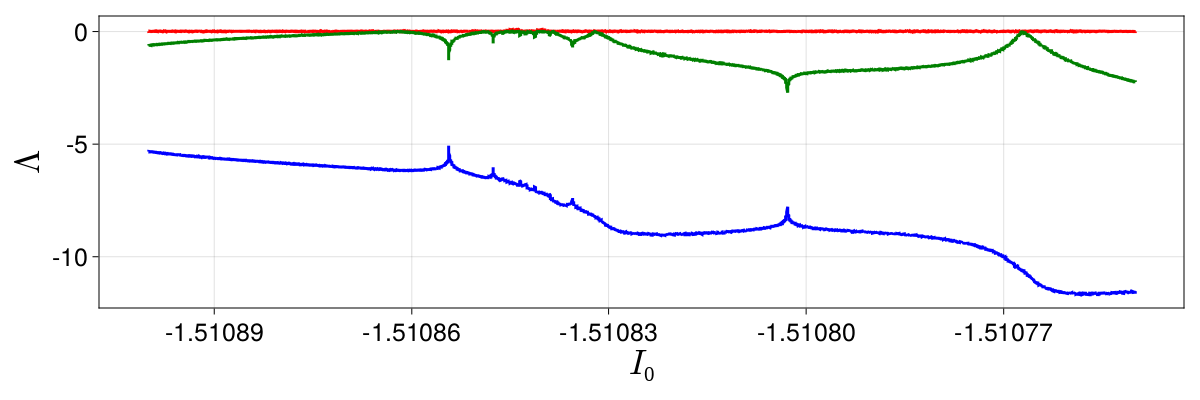

In [67]:
f = Figure(resolution = (1200, 400))
axis = Axis(f[1, 1], xlabel = L"I_0", ylabel = L"\Lambda", xlabelsize = 35, ylabelsize = 35,
            xticklabelsize = 25,yticklabelsize = 25 )
lines!(axis, I0range, Λs[:, 1], color = :red, linewidth = 3.0)
lines!(axis, I0range, Λs[:, 2], color = :green, linewidth = 3.0)
lines!(axis, I0range, Λs[:, 3], color = :blue, linewidth = 3.0)
f